# Задание 1 Часть 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
for c in data.columns:
    nans = data[c].loc[data[c].isnull().values == True]
    for i in nans.index:
        data.loc[i,c] = data[c].mean()    
# data = data.fillna(data.mean())

In [4]:
target = pd.read_csv('scores.csv', names=['Evaluation'])
regr = LinearRegression()
scores = cross_val_score(regr, data, target, cv=5)
scores

array([ 0.03156215,  0.20725018,  0.0986252 ,  0.19108612,  0.07705634])

In [5]:
attendance = pd.read_csv('attendance.csv', delimiter=';')
support = pd.read_csv('school_support.txt', sep='\n', names=['Scholarship'])
attendance[attendance == '+'] = 1
attendance = attendance.fillna(0)
attendance = attendance.sum(1)
X = data.copy()
X['Attendance'] = attendance
sup = pd.Series(np.zeros(len(X)), dtype=int)
sup.iloc[[support.values.reshape(len(support))]] = 1
X['Sch_Help_Y'] = sup

In [6]:
br_feature = X['plans_universitypast_failures']
uni = pd.Series(br_feature.values / 10, dtype=int)
fail = pd.Series(abs(br_feature.values) % 10, dtype=int)
# X['plans_university'] = uni
# X['past_failures'] = fail
X.insert(X.columns.get_loc('plans_universitypast_failures') + 1, 'plans_university', uni)
X.insert(X.columns.get_loc('plans_university') + 1, 'past_failures', fail)
X = X.drop('plans_universitypast_failures', 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12100fac8>]], dtype=object)

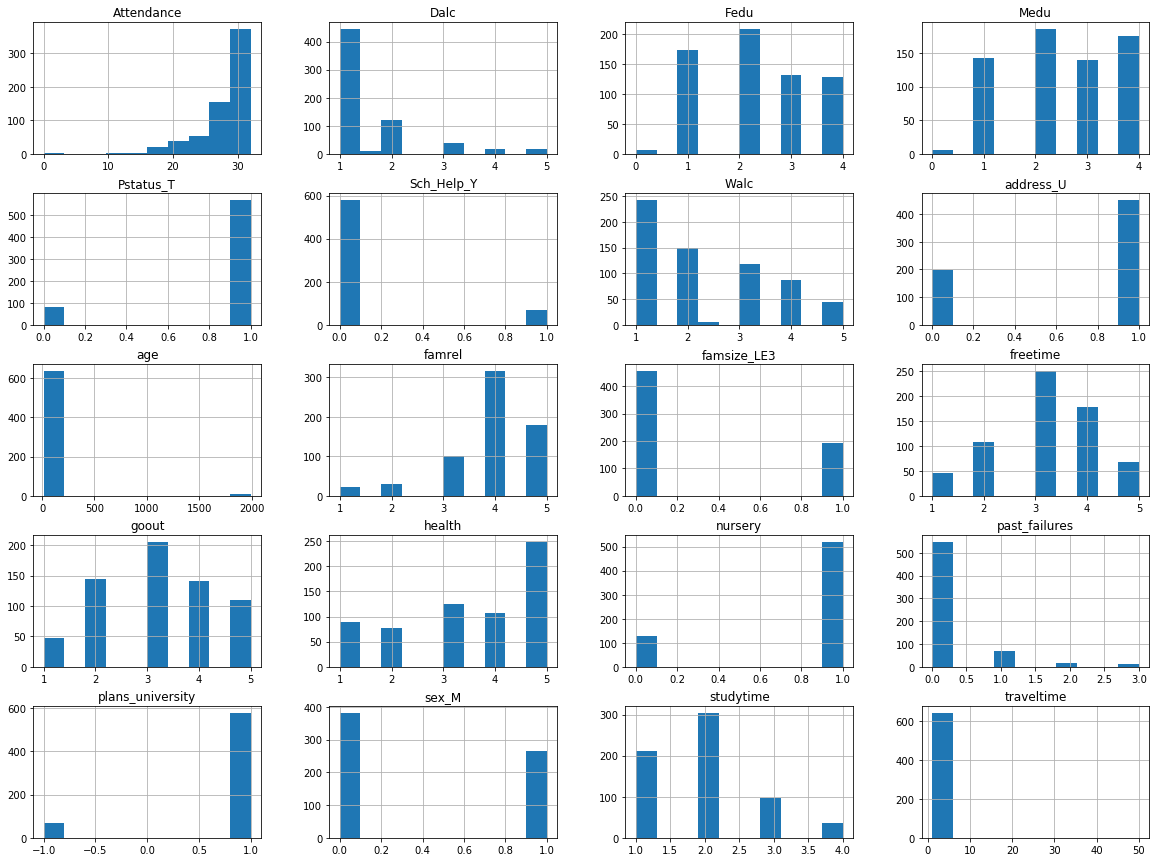

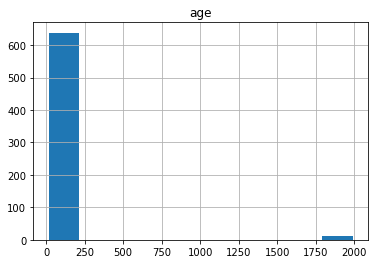

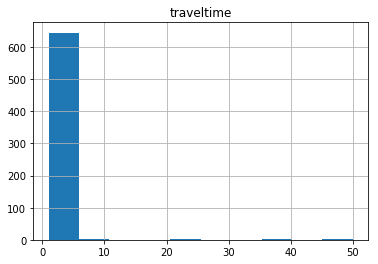

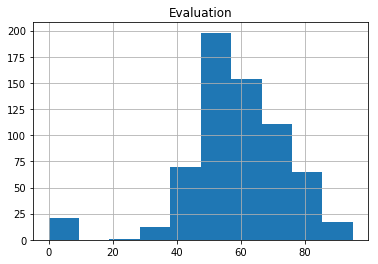

In [7]:
X.hist(figsize=(20,15))
X.hist(column='age')
X.hist(column = 'traveltime')
target.hist()

In [8]:
#Age
vals = X['age'].loc[X['age'] > 1750]
X.loc[vals.index, 'age'] = 2006 - vals

#Traveltime
vals = X['traveltime'].loc[(X['traveltime'] > 4) | (X['traveltime'] < 1)]
X.loc[vals.index, 'traveltime'] = X['traveltime'].mean()
X['traveltime'] = X['traveltime'].apply(int)

#Scores
vals = target['Evaluation'].loc[target['Evaluation'] != 0.0]
# vals.min()
val = vals[vals.values < 1.0]
# vals.max()
target['Evaluation'][val.index] = val * 100

In [9]:
regr = LinearRegression()
scores = cross_val_score(regr, X, target, cv=5)
scores

array([ 0.24867478,  0.29142458,  0.13704844,  0.27432613,  0.19757221])

In [324]:
# 2ой способ поиска выбросов
er_age = np.array([])
for i in X.age:
    if (i not in range(10,60)) | (i.dtype != np.int64):
        print('Error in age')
        er_age = np.append(er_age, i)
        
er_traveltime = np.array([])
for i in X.traveltime:
    if (i not in range(1,5)):
        print('Error in traveltime')
        er_traveltime = np.append(er_traveltime, i)

er_studytime = np.array([])
for i in X.studytime:
    if (i not in range(1,5)):
        print('Error in studytime')
        er_studytime = np.append(er_studytime, i)

er_sex = np.array([])
for i in X.sex_M:
    if i not in range(0,2):
        print('Error sex_M')
        er_sex = np.append(er_sex, i)

er_adress = np.array([])
for i in X.address_U:
    if i not in range(0,2):
        print('Error address_U')
        er_adress = np.append(er_adress, i)
        
er_fam = np.array([])
for i in X.famsize_LE3:
    if i not in range(0,2):
        print('Error famsize_LE3')
        er_fam = np.append(er_fam, i)
        
er_stat = np.array([])
for i in X.Pstatus_T:
    if i not in range(0,2):
        print('Error Pstatus_T')
        er_stat = np.append(er_stat, i)
        
er_nurs = np.array([])
for i in X.nursery:
    if i not in range(0,2):
        print('Error nursery')
        er_nurs = np.append(er_nurs, i)
        
er_uni = np.array([])
for i in X.plans_university:
    if i not in [-1, 1]:
        print('Error plans_university')
        er_uni = np.append(er_uni, i)

er_failures = np.array([])
for i in X.past_failures:
    if (i not in range(0,5)):
        print('Error in past_failures')
        er_failures = np.append(er_failures, i)
        
er_scores = np.array([])
for i in target.Evaluation:
    if (i not in range(0,101)) & (np.modf(i)[0] != 0):
        print('Error in scores')
        er_scores = np.append(er_scores, i)

**Ипользуемые открытые источники: http://scikit-learn.org/stable/modules/cross_validation.html**

**http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py**

**Оценка за часть 2: 4.0**

**Общая оценка: 10.0**